In [1]:
import pandas as pd
import numpy as np
import ht

In [2]:

def load_table():
    url ='heat_table.csv'

    return pd.read_csv(url, index_col=[0])

def load_summary_table():
    url ='summary_table.csv'

    return pd.read_csv(url, index_col=[0])

In [3]:
def thermo_prop(sg,t):
    t = 1.8*t+32
    thermo_list = []
    thermal_coductivity = (0.813/sg)*(1-0.0003*(t-32))
    cp = (1/np.sqrt(sg))*(0.388+0.00045*t)
    cv = cp-(0.09/sg)
    latent_heat = (1/sg)*(110.9-0.09*t)
    thermo_list.append([thermal_coductivity,cp,cv,latent_heat])
    return thermo_list

In [4]:
thermo_prop(.76,80)

[[1.0235242105263158,
  0.5359151543216324,
  0.41749410169005347,
  125.07894736842107]]

In [35]:
from thermo.chemical import Chemical
from thermo.viscosity import ViscosityLiquid
from thermo import Mixture
import thermo

# Define the components of the mixture and their mole fractions
components = ['water', thermo.unifac.NISTUFMG[2][0]]
mole_fractions = {'water':0.8, 'ethanol':0.2} #[0.6, 0.4]

# Define the temperature and pressure of the mixture
temperature = 298.15# K
pressure = 101325 # Pa

# Create a Chemical object for each component
chemicals = [Chemical(component) for component in components]
liquid_mixture = Mixture(list(mole_fractions.keys()), ws=list(mole_fractions.values()), T=temperature, P=pressure)
# Calculate the viscosity of the mixture using the ViscosityLiquid function
#viscosity = ViscosityLiquid.Mixture(chemicals, mole_fractions, temperature, pressure)
print(liquid_mixture.rho,liquid_mixture.Cp/4184,liquid_mixture.phase,liquid_mixture.k,liquid_mixture.mu)
#print(f"The viscosity of the liquid mixture at {temperature} K and {pressure} Pa is {viscosity} Pa.s")
#thermo.datasheet.tabulate_liq('water', Tmin=None, Tmax=None, pts=10)
#thermo.unifac.NISTUFMG

968.1415468976672 1.0322765764555786 l 0.32180084890642174 0.0019024866584633436


In [6]:


gases_list = ['water', 'hydrogen', 'nitrogen', 'carbon dioxide', 'hydrogen sulfide','methane',
'ethane', 'propane', 'isobutane', 'n-butane', 'isopentane', 'n-pentane', 'hexane',
'heptane', 'octane', 'nonane']
sum([1/len(gases_list) for i in range(len(gases_list))])

1.0

In [7]:
from thermo import Mixture
gases_list = ['water', 'hydrogen', 'nitrogen', 'carbon dioxide', 'hydrogen sulfide','methane',
'ethane', 'propane', 'isobutane', 'n-butane', 'isopentane', 'n-pentane', 'hexane',
'heptane', 'octane', 'nonane']
liquid_list= ['water', 'ethanol', 'methanol', 'acetic acid', 'propylene glycol', 'glycerol', 'dimethyl sulfoxide', 'benzene', 'toluene', 'xylene', 'acetone', 'butanol', 'pentanol', 'hexanol', 'heptanol', 'octanol', 'nonanol', 'decanol', 'ethylene glycol', 'diethylene glycol', 'propylene carbonate', 'tetrahydrofuran', 'acetonitrile', 'formamide', 'isopropyl alcohol', 'methyl ethyl ketone', 'dioxane', 'pyridine', 'hexamethylphosphoramide','dimethylamine', 'diethylamine', 'triethylamine', 'trimethylamine', 'ethanolamine', 'diethanolamine', 'triethanolamine', 'methyldiethanolamine', 'piperazine']
range(len(gases_list)+len(liquid_list))
c = gases_list + liquid_list
sum([1/(len(gases_list)+len(liquid_list)) for i in range(len(gases_list)+len(liquid_list))])
mixture = Mixture(c, zs=[1/(len(gases_list)+len(liquid_list)) for i in range(len(gases_list)+len(liquid_list))], T=298, P=100000)
mixture.VF

0.14800290740585603

0.4759737145445875
0.513771553468766


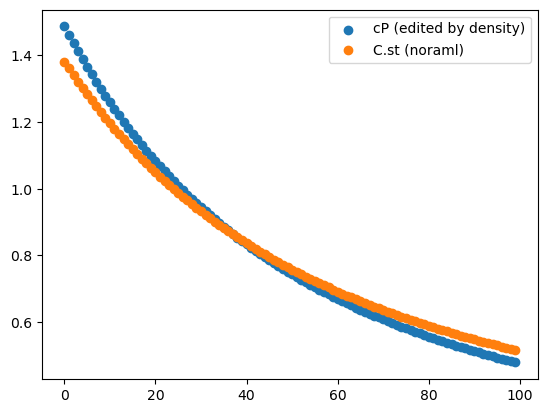

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def density(sg,temperature):
                api = (141.5/sg) - 131.5
                if api <=14.9:
                    eta= 0.00035
                elif api <= 34.9:
                    eta= 0.0004
                elif api <= 50.9:
                    eta= 0.0005
                elif api <= 63.9:
                    eta= 0.0006
                elif api <= 78.9:
                    eta= 0.0007
                elif api <= 88.9:
                    eta= 0.0008
                elif api <= 93.9:
                    eta= 0.00035 
                elif api <= 100:
                    eta= 0.0009   
                else: print("please enter a valid Specific gravity") 
                density = sg*1000*(1-eta*((temperature*1.8+32)-60))
                return density
def vis_1point(t,analysis_temp,analysis_mu,sg,unit):
    if not unit: #unit == false, mu is in C.st
        T =t
        mu = analysis_mu
        c = -0.8696
        b= np.log10(mu)-c
        s = 0.2008*b+1.6180
        log_mu = (b/(1+((T-analysis_temp)/310.93))**s)+c
        mu_calc =10**log_mu
    else:
        T =t
        mu = analysis_mu/(0.001*density(sg,analysis_temp))
        c = -0.8696
        b= np.log10(mu)-c
        s = 0.2008*b+1.6180
        log_mu = (b/(1+((T-analysis_temp)/310.93))**s)+c
        mu_calc =(10**log_mu)*(0.001*density(sg,analysis_temp))
    return mu_calc
#print(log_mu,mu_calc)
list = []
for i in range(100):
    
    list.append(vis_1point(i,37.78,0.8559,0.7914,True))
list2 = []
for i in range(100):
    
    list2.append(vis_1point(i,37.78,0.8559,0.7914,False))
print(vis_1point(100,38,0.8559,0.7914,True))
print(vis_1point(100,38,0.8559,0.7914,False))
plt.scatter(x=range(100), y=list, label = 'cP (edited by density)')
plt.scatter(x=range(100), y=list2, label = 'C.st (noraml)')
plt.legend()

In [9]:
print(vis_1point(37.78,20,1.2497133871091246))
print(vis_1point(100,0,10000))

TypeError: vis_1point() missing 2 required positional arguments: 'sg' and 'unit'

In [10]:

from thermo import Mixture
import thermo
from thermo.property_package import GceosBase

mole_fractions = {'methanol':0.2, 'ethanol':0.8} 

# Define the temperature and pressure of the mixture
temperature = 300# K
pressure = 10000000 # Pa


# Create a Chemical object for each component

mixture = Mixture([i for i in mole_fractions.keys()], ws=[i for i in mole_fractions.values()], T=temperature, P=pressure, pkg= GceosBase)
mixture.MW

42.3597741434887

In [11]:
from thermo import ChemicalConstantsPackage, PRMIX, CEOSLiquid, CEOSGas, FlashPureVLS
import pandas as pd
gases_list = ['methane', 'ethanol', 'nitrogen', 'carbon dioxide', 'hydrogen sulfide','methane',
'ethane', 'propane', 'isobutane', 'n-butane', 'isopentane', 'n-pentane', 'hexane',
'heptane', 'octane', 'nonane']
constants, correlations = ChemicalConstantsPackage.from_IDs(gases_list)
zs = [1/(len(gases_list)) for i in range(len(gases_list))]
from thermo.interaction_parameters import IPDB
kijs = IPDB.get_ip_asymmetric_matrix('ChemSep PR', constants.CASs, 'kij')
eos_kwargs = {'Pcs': constants.Pcs, 'Tcs': constants.Tcs, 'omegas': constants.omegas, 'kijs': kijs}
#eos_kwargs = dict(Tcs=constants.Tcs, Pcs=constants.Pcs, omegas=constants.omegas)
liquid = CEOSLiquid(PRMIX, HeatCapacityGases=correlations.HeatCapacityGases,
eos_kwargs=eos_kwargs)
gas = CEOSGas(PRMIX, HeatCapacityGases=correlations.HeatCapacityGases,
eos_kwargs=eos_kwargs)
flasher = FlashPureVLS(constants, correlations, liquids=[liquid], gas=gas, solids=[])
T1 = 273.15+20
gas_mixture = flasher.flash(P=100000, T=T1,zs=zs)
props = ['density', 'Cp','Cv', 'thermal conductivity','viscosity']
prop_calc_table = pd.DataFrame(index=props,columns=['Calculated_properties','Method'])
prop_calc_table.loc['Phase','Calculated_properties'] = gas_mixture.phase
prop_calc_table.loc['Vapor Fraction','Calculated_properties'] = gas_mixture.VF
prop_calc_table.loc['thermal conductivity','Calculated_properties'] = gas_mixture.k()
prop_calc_table.loc['density','Calculated_properties'] = gas_mixture.rho_mass()*(1000/847.38)
prop_calc_table.loc['Cp','Calculated_properties'] = gas_mixture.Cp()/4184
prop_calc_table.loc['Cv','Calculated_properties'] = gas_mixture.Cv()/4184
prop_calc_table.loc['viscosity','Calculated_properties'] = gas_mixture.mu()*1000
prop_calc_table.loc['Molecular Weight','Calculated_properties'] = gas_mixture.MW()
prop_calc_table.loc['Compressibility factor','Calculated_properties'] = gas_mixture.Z()
prop_calc_table.loc['K (Cp/Cv)','Calculated_properties'] = gas_mixture.isentropic_exponent()
prop_calc_table.loc[:,'Method']= 'Thermo Library'
gas_mixture.mu()*1000
prop_calc_table
-gas_mixture.Hc_lower_mass()/4184
gas_mixture.Hcs_lower_mass*np.array(zs)
pd.Series(zs)*pd.Series(gas_mixture.Hcs_lower_mass).fillna(0)
pd.Series(gas_mixture.MWs)/gas_mixture.MW()

0     0.270809
1     0.777670
2     0.472887
3     0.742914
4     0.575311
5     0.270809
6     0.507588
7     0.744368
8     0.981147
9     0.981147
10    1.217926
11    1.217926
12    1.454705
13    1.691485
14    1.928264
15    2.165043
dtype: float64

In [12]:
gases_list = ['water', 'hydrogen', 'nitrogen', 'carbon dioxide', 'hydrogen sulfide','methane',
'ethane', 'propane', 'isobutane', 'n-butane', 'isopentane', 'n-pentane', 'hexane',
'heptane', 'octane', 'nonane']
liquid_list= ['water', 'ethanol', 'methanol', 'acetic acid', 'propylene glycol', 'glycerol', 'dimethyl sulfoxide', 'benzene', 'toluene', 'xylene', 'acetone', 'butanol', 'pentanol', 'hexanol', 'heptanol', 'octanol', 'nonanol', 'decanol', 'ethylene glycol', 'diethylene glycol', 'propylene carbonate', 'tetrahydrofuran', 'acetonitrile', 'formamide', 'isopropyl alcohol', 'methyl ethyl ketone', 'dioxane', 'pyridine', 'hexamethylphosphoramide','dimethylamine', 'diethylamine', 'triethylamine', 'trimethylamine', 'ethanolamine', 'diethanolamine', 'triethanolamine', 'methyldiethanolamine', 'piperazine']
c = gases_list + liquid_list
constants, correlations = ChemicalConstantsPackage.from_IDs(c)
zs = [1/(len(c)) for i in range(len(c))]
eos_kwargs = dict(Tcs=constants.Tcs, Pcs=constants.Pcs, omegas=constants.omegas)
liquid = CEOSLiquid(PRMIX, HeatCapacityGases=correlations.HeatCapacityGases,
eos_kwargs=eos_kwargs)
gas = CEOSGas(PRMIX, HeatCapacityGases=correlations.HeatCapacityGases,
eos_kwargs=eos_kwargs)
flasher = FlashVL(constants, correlations, liquid=liquid, gas=gas)
T1 = 273.15+30
state_1 = flasher.flash(P=100000, T=T1,zs=zs)
state_1.VF

NameError: name 'FlashVL' is not defined

In [ ]:
from thermo import ChemicalConstantsPackage, CEOSGas, CEOSLiquid, PRMIX, FlashVL
from thermo.interaction_parameters import IPDB
constants, properties = ChemicalConstantsPackage.from_IDs( ['water','hydrogen'])#['hydrogen','methane', 'ethane','propane'])
kijs = IPDB.get_ip_asymmetric_matrix('ChemSep PR', constants.CASs, 'kij')

eos_kwargs = {'Pcs': constants.Pcs, 'Tcs': constants.Tcs, 'omegas': constants.omegas, 'kijs': kijs}
gas = CEOSGas(PRMIX, eos_kwargs=eos_kwargs, HeatCapacityGases=properties.HeatCapacityGases)
liquid = CEOSLiquid(PRMIX, eos_kwargs=eos_kwargs, HeatCapacityGases=properties.HeatCapacityGases)
flasher = FlashVL(constants, properties, liquid=liquid, gas=gas)
zs = [1,0]
t = 273.15+20
PT = flasher.flash(T=t, P=98066.5, zs=zs)
#PT.VF, PT.gas.zs, PT.liquid0.zs
PT.mu()*1000


[1, 0, 0]

In [ ]:
import pandas as pd
properties = {    "Mass": "kg",    "Length": "m",    "Time": "s",    "Temperature": "°C",    "Heat capacity": "J/(kg*°C)",    "Enthalpy": "J",    "Thermal conductivity": "W/(m*°C)",    "Mass flow rate": "kg/hr",    "Viscosity": "cP",    "Density": "kg/m³"}
s = pd.Series(properties)
data = {    "Mass": 10,    "Length": 20,    "Time":30,    "Temperature": 40,    "Heat capacity": 50,    "Enthalpy": 60,    "Thermal conductivity": 70,    "Mass flow rate": 80,    "Viscosity": 1}
df = pd.DataFrame( index=data.keys(), columns=['data'])
df['data'] = data.values()
df

,data
Mass,10
Length,20
Time,30
Temperature,40
Heat capacity,50
Enthalpy,60
Thermal conductivity,70
Mass flow rate,80
Viscosity,1


In [ ]:
df.merge(s.rename('series'), left_index=True,right_index=True)

,data,series
Mass,10,kg
Length,20,m
Time,30,s
Temperature,40,°C
Heat capacity,50,J/(kg*°C)
Enthalpy,60,J
Thermal conductivity,70,W/(m*°C)
Mass flow rate,80,kg/hr
Viscosity,1,cP


In [ ]:
import pandas as pd
import numpy as np
j_const = pd.read_csv('j_consts.csv')
j_const
Res = 20000
Do =19
tpitch=25.4
a1 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['a_{1}'],0).sum()
a2 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['a_{2}'],0).sum()
a3 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['a_{3}'],0).sum()
a4 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['a_{4}'],0).sum()
b1 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['b_{1}'],0).sum()
b2 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['b_{2}'],0).sum()
b3 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['b_{3}'],0).sum()
b4 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['b_{4}'],0).sum()
a = a3/(1+0.14*(Res**a4))
b = b3/(1+0.14*(Res**b4))
j = a1 * ((1.33/(tpitch/Do))**a)*(Res**a2)
j

0.007394105695403067

In [ ]:
import pandas as pd
import openpyxl
import ht
import numpy as np
workbook = openpyxl.load_workbook('datasheet_bell.xlsx', data_only=True)
worksheet = workbook['Sheet1']

t1_s = worksheet['H20'].value
t2_s =worksheet['I20'].value
m_s = worksheet['H14'].value
Cp_s = worksheet['H24'].value
mu_s = worksheet['H22'].value*0.001
rho_s =  worksheet['H21'].value
k_s = worksheet['H25'].value
fouling_s = worksheet['H30'].value
mu_t = worksheet['K22'].value*0.001
fouling_t =  worksheet['K30'].value
rho_t =  worksheet['K21'].value
m_t = worksheet['K14'].value
t1_t =  worksheet['K20'].value
t2_t = worksheet['L20'].value
Cp_t = worksheet['K24'].value
k_t =worksheet['K25'].value

shell_side ='Hot Side'
s2 = 'Cold side T2'
if shell_side == 'Hot Side':
    T1 = t1_s  
    T2 =t2_s
    m_c = m_t
    
    m_h = m_s
    t1 = t1_t
    t2 = t2_t
    Cp_h = Cp_s
    Cp_c = Cp_t
    
else:
    T1 = t1_t  
    T2 =t2_t
    m_c = m_s
    m_h = m_t
    t1 = t1_s
    t2 = t2_s
    Cp_h = Cp_t
    Cp_c = Cp_s
if s2 == 'Hot side mass flow':
    Q = m_c * Cp_c * (t2-t1)
    m_h = Q/(Cp_h*(T1-T2))
elif s2 == 'Hot side T1':
    Q = m_c * Cp_c * (t2-t1)
    T1 = T2 + (Q/m_h*Cp_h)
elif s2 == 'Hot side T2':
    Q = m_c * Cp_c * (t2-t1)
    T2 = T1 - (Q/m_h*Cp_h)
elif s2 == 'Cold side mass flow':
    Q = m_h * Cp_h * (T1-T2)
    m_c = Q/(Cp_c*(t2-t1)) 
elif s2 == 'Cold side T1':
    Q = m_h * Cp_h * (T1-T2)
    t1 = t2 - (Q/m_c*Cp_c)
else: #cold side T2
    Q = m_h * Cp_h * (T1-T2)
    t2 = t1 + (Q/m_c*Cp_c)
dTlm = ht.LMTD(T1,T2,t1,t2)

ft = ht.F_LMTD_Fakheri(t1,t2,T1,T2,1)
Do = 19
thick = 1.5
Di = (Do - 2*thick)*0.001

shell_D = 580/1000
tn = 374
pn = 1
#Do = float(geo_df.iloc[2,1])
#Di = (Do - 2*float(geo_df.iloc[3,1]))*0.001
L = 8000
tpitch = 25.4
b_space = 500
b_cut = 25



pitch ='square'
if pitch == 'square':
    De = 4*(((tpitch*0.001)**2)-(3.14*((Do*0.001)**2)*0.25))/(3.14*Do*0.001)
else:
    De = 8*(0.43301*((tpitch*0.001)**2)-(3.14*((Do*0.001)**2)*0.125))/(3.14*Do*0.001)
C = tpitch-Do
As = (shell_D*b_space*C)/(tpitch*1000)
Gs = m_h/(As*3600)
Res = (De*Gs)/mu_s
f = np.exp(0.576-(0.19*np.log(Res)))
Nb = (L/b_space)-1
dp_s = ((f*(Gs**2)*(Nb+1)*shell_D)/(2*rho_s*De))*0.000010197
L = L/1000
A = np.pi*L*Do*0.001*1*tn
Cp_t = Cp_t*4184
Cp_s = Cp_s*4184
cross_A=(np.pi*0.25*(Di**2))*(tn/pn)
velocity_t = m_c/(rho_t*3600*cross_A)
Ret=(rho_t*velocity_t*Di)/mu_t
f_t =1/(1.58*np.log(Ret)-3.28)**2 # valid for Re 2300 to 5,000,000 and Pr 0.5 to 2000
port_1 = f_t*L*pn/Di
port_2 = rho_t*(velocity_t**2)/2
dp_t = (4*(port_1)+4*(pn))*port_2*0.000010197
h_shell = (0.36*((Res)**0.55)*((Cp_s*mu_s/k_s)**(1/3)))*k_s/De #for Re between 2000 and 1,000,000
Pr = Cp_t*mu_t/k_t
Nu = ((0.5*f_t*(Ret-1000)*Pr))/(1+12.7*((0.5*f_t)**0.5)*((Pr**(2/3))-1)) # valid for Re 2300 to 5,000,000 (Gnielinski)
h_t = Nu *k_t/Di
d_ratio = Do/(Di*1000)
Uc = 1/((d_ratio/h_t)+(Do*0.001*np.log(d_ratio)/(2*60))+(1/h_shell))
Ud = 1/((d_ratio/h_t)+(Do*0.001*np.log(d_ratio)/(2*60))+(1/h_shell)+fouling_s+(d_ratio*fouling_t))
U_calc = Q/(ft*dTlm*A)
Rdesign = - (1/Uc) + (1/Ud)
Rsevice = - (1/Uc) + (1/U_calc)
j_const = pd.read_csv('j_consts.csv')
a1 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['a_{1}'],0).sum()
a2 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['a_{2}'],0).sum()
a3 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['a_{3}'],0).sum()
a4 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['a_{4}'],0).sum()
b1 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['b_{1}'],0).sum()
b2 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['b_{2}'],0).sum()
b3 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['b_{3}'],0).sum()
b4 = np.where((Res < j_const['Reynolds_max']) & (Res < j_const['Reynolds_max']) & (j_const['Layout'] == 90) ,j_const['b_{4}'],0).sum()
a = a3/(1+0.14*(Res**a4))
b = b3/(1+0.14*(Res**b4))
j = a1 * ((1.33/(tpitch/Do))**a)*(Res**a2)
h_ideal = j*Cp_s*(m_s/(3600*As))*(k_s/(Cp_s*mu_s))**(2/3)



19

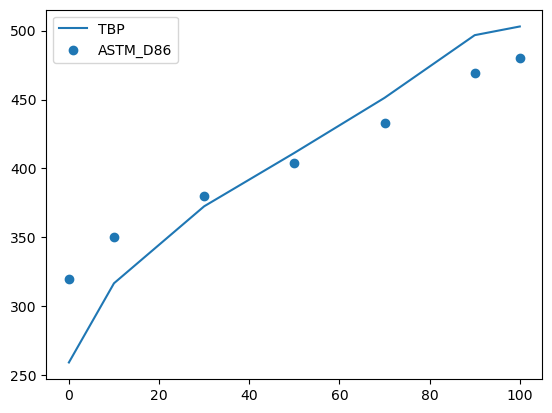

In [ ]:
import numpy as np
import pandas as pd
list1,list2 = [0,10,30,50,70,90,100],[160,176.7,193.3,206.7,222.8,242.8,248.9]
a,b = [7.4012,4.9004,3.0305,0.8718,2.5282,3.0419,0.11798],[0.60244,0.71644,0.80076,1.0258,0.82002,0.75497,1.6606]
list2 = [1.8*i+32 for i in list2]
dict = {list1[i]: list2[i] for i in range(len(list1))}
def convert_ASTM_to_TBP(astm,dict):
    TBP = {}
    if astm == 'ASTM_D86':
        
        TBP[50] = (0.8718*(dict[50])**1.0258)
        
        a_i,b_i = 4,4
        for i in [70,90]:
            j = i -20
            
            TBP_i = TBP[j] +a[a_i]*((dict[i]-dict[j]))**b[b_i]
            TBP[i]= TBP_i
            a_i +=1
            b_i +=1
        TBP[100]=TBP[90]+0.11798*(dict[100]-dict[90])**1.6606
        a_i,b_i = 2,2
        for i in [30,10]:
            j = i + 20
            
            TBP_i = TBP[j] -a[a_i]*((dict[j]-dict[i]))**b[b_i]
            TBP[i]= TBP_i
            a_i -=1
            b_i -=1
        TBP[0]=TBP[10]-a[0]*(dict[10]-dict[0])**b[0]
    keys = list(TBP.keys())
    values = list(TBP.values())
    sorted_value_index = np.argsort(values)
    TBP = {keys[i]: values[i] for i in sorted_value_index}
    return TBP


TBP_dict = convert_ASTM_to_TBP('ASTM_D86',dict)
import matplotlib.pyplot as plt

plt.plot(TBP_dict.keys(),TBP_dict.values(), label= 'TBP')
plt.scatter(x= dict.keys(), y= dict.values(), label= 'ASTM_D86')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

def convert_ASTM_to_TBP(astm,number):
    number = number*1.8+32
    TBP = 0
    if astm == 'ASTM_D86':
        TBP = ((0.8718*(number)**1.0258)-32)/1.8
    if astm == 'ASTM_D2887':
        TBP= (number-32)/1.8
    if astm == 'ASTM_D2287':
        TBP = ((0.77601*(number)**1.0395)-32)/1.8
    if astm == 'ASTM_D1160':
        TBP = (number-32)/1.8
    return TBP
print(convert_ASTM_to_TBP('ASTM_D86',206.7),convert_ASTM_to_TBP('ASTM_D2287',101.7),convert_ASTM_to_TBP('ASTM_D1160',402.7))

def sg(API):
    sg = 141.5/(131.5+API)
    return sg 
def mol_wt(tb,sg):
    mwt=4.567*(10**-5)*(tb**2.1962)*(sg**-1.0164)
    return mwt
def vis_tb(t,sg,tb):
    t = t +273.15
    tb = tb +273.15
    api = (141.5/sg) - 131.5
    b = np.exp(5.471+(0.00342*tb))
    a = -0.0339*(api**0.188)+(0.241*(tb/t))
    vis = a*np.exp(b/t)
    return vis
def vis_tb_mod(t,sg,tb):
    t = t +273.15
    tb = tb +273.15
    api = (141.5/sg) - 131.5
    a = -6.489436
    b = -0.614916
    c = -7.285711
    d = 7.448011
    e = 251.94553
    ln_vis = a +(b*np.log(api)) + (c*np.log(tb/t)) + (d*(tb/t))+(e/t)
    vis = np.exp(ln_vis)
    return vis
print(vis_tb(20,0.8394,convert_ASTM_to_TBP('ASTM_D86',283.2)))
print(vis_tb_mod(20,0.8394,convert_ASTM_to_TBP('ASTM_D86',283.2)))
convert_ASTM_to_TBP('ASTM_D86',283.2)

210.69608391628017 96.8501813080738 402.7
105.26237278903793
5.532929771401653


290.8844703076448

In [14]:
from scipy.constants import bar
from thermo import ChemicalConstantsPackage, PRMIX, CEOSLiquid, CoolPropLiquid, CEOSGas, CoolPropGas, FlashPureVLS
pressure = 100000
temperature = 273.15
fluid = 'water'
constants, correlations = ChemicalConstantsPackage.from_IDs([fluid])
T1 = temperature
P1 = pressure
#P2 = 1*bar
zs = [1]
backend = 'PR'
gas = CoolPropGas(backend, fluid, T=T1, P=P1, zs=zs)
liquid = CoolPropLiquid(backend, fluid, T=T1, P=P1, zs=zs)
flasher = FlashPureVLS(constants, correlations, gas=gas, liquids=[liquid], solids=[])
state_1 = flasher.flash(P=pressure, T=temperature,zs=zs)
state_1.rho_mass()

861.8767364831092

In [15]:
import numpy as np
from thermo import *
from chemicals import *
from thermo.interaction_parameters import IPDB
pressure = 100000
temperature_k = 273.15
lists = ['water','ethanol','benzene']#['methane', 'ethane', 'propane', 'isobutane', 'n-butane', 'isopentane','n-pentane', 'hexane', 'heptane', 'octane', 'nonane', 'nitrogen']
constants, properties = ChemicalConstantsPackage.from_IDs(lists)
T, P = temperature_k, 5e6
zs = [0.8,0.2]#[.8, .08, .032, .00963, .0035, .0034, .0003, .0007, .0004, .00005, .00002, .07]
eos_kwargs = dict(Tcs=constants.Tcs, Pcs=constants.Pcs, omegas=constants.omegas)
gas = IAPWS95Gas(T=temperature_k, P=pressure, zs=zs) #CEOSGas(SRKMIX, eos_kwargs, HeatCapacityGases=properties.HeatCapacityGases, T=T,P=P, zs=zs)
liq = IAPWS95Liquid(T=temperature_k, P=pressure, zs=zs) #CEOSLiquid(SRKMIX, eos_kwargs, HeatCapacityGases=properties.HeatCapacityGases, T=T, P=P, zs=zs)

# Set up a two-phase flash engine, ignoring kijs
flasher = FlashPureVLS(constants, properties, liquids=[liq], gas=gas, solids=[])
# Set a composition - it could be modified in the inner loop as well
# Do a test flash
flasher.flash(T=T, P=P, zs=zs).MW()
print(IPDB.get_ip_asymmetric_matrix('ChemSep NRTL', constants.CASs, 'alphaij'))
print(IPDB.get_ip_asymmetric_matrix(name='ChemSep NRTL',CASs= constants.CASs, ip='bij'))

IPDB.get_tables_with_type('NRTL') #.get_parameter_vector(parametername='ChemSep NRTL',CASs= constants.CASs, ip='cij')

[[0.0, 0.2937, 0.3], [0.2937, 0.0, 0.297], [0.3, 0.297, 0.0]]
[[0.0, 624.8676222389441, 0], [-29.166654483541816, 0.0, 128.5016871766647], [0, 526.9694322798201, 0.0]]


[]

In [16]:
tausB = [[0, 526.02, 309.64], [-318.06, 0, -91.532], [1325.1, 302.57, 0]]

tausB = [[-v for v in r] for r in tausB]
tausB

[[0, -526.02, -309.64], [318.06, 0, 91.532], [-1325.1, -302.57, 0]]

In [17]:
#!/usr/bin/env python

from thermo import ChemicalConstantsPackage, PRMIX, CEOSGas, FlashVL, \
    EquilibriumState, GibbsExcessLiquid
from thermo.interaction_parameters import IPDB
from thermo.nrtl import NRTL
from thermo import ChemicalConstantsPackage, PRMIX, CEOSLiquid, CEOSGas, FlashPureVLS,IAPWS95Gas,IAPWS95Liquid
import decimal
decimal.getcontext().prec = 100

liquid_list = ['water', 'ethanol', 'methanol',  'propylene glycol', 'benzene', 'toluene', 'xylene', 'ethylene glycol', 'diethylene glycol','isopropyl alcohol', 'methyl ethyl ketone', 'dimethylamine']#,  'triethanolamine']#'methyldiethanolamine']
#liquid_list = ['water', 'ethanol']
liquid_list= ['water', 'ethanol', 'methanol', 'acetic acid', 'propylene glycol', 'glycerol', 'dimethyl sulfoxide', 'benzene', 'toluene', 'xylene', 'acetone', 'butanol', 'pentanol', 'hexanol', 'heptanol', 'octanol', 'nonanol', 'decanol', 'ethylene glycol', 'diethylene glycol', 'propylene carbonate', 'tetrahydrofuran', 'acetonitrile', 'formamide', 'isopropyl alcohol', 'methyl ethyl ketone', 'dioxane', 'pyridine', 'dimethylamine', 'diethylamine', 'triethylamine', 'trimethylamine', 'ethanolamine', 'diethanolamine', 'triethanolamine', 'methyldiethanolamine']
import pandas as pd
import numpy as np

if zs is None:
    zs = [1.0/len(liquid_list)] * len(liquid_list)
consts, props = ChemicalConstantsPackage.from_IDs(liquid_list)
kijs = IPDB.get_ip_asymmetric_matrix('ChemSep PR', consts.CASs, 'kij')
eos_kwargs = {'Pcs': consts.Pcs, 'Tcs': consts.Tcs, 'omegas': consts.omegas, 'kijs': kijs}
gas = CEOSGas(PRMIX, eos_kwargs=eos_kwargs, HeatCapacityGases=props.HeatCapacityGases)

#a_consts = pd.read_csv('gibbs_constsaMod.csv',index_col=[0])
tau_a =[[0.0,  624.8676222389441,  398.95345259688855,  0,  0,  0,  0,  0,  0,  0,  666.7541568707342,  1325.3268195999854,  0,  1505.222468698739,  0,  0,  0,  0,  0,  597.1859182768037,  0,  868.1028598337939,  0,  0,  0,  910.770391181574,  360.28465462814955,  923.4521776111364,  0,  690.5742547767117,  14310.123318400025,  0,  0,  0,  0,  0], [-29.166654483541816,  0.0,  -35.48160673137118,  -17.208648709010642,  0,  0,  0,  128.5016871766647,  272.9527161797593,  0,  188.88330093290168,  0,  0,  0,  0,  0,  0,  0,  827.3172688973923,  0,  0,  -100.99188300716756,  266.56882285584066,  0,  347.2915262732114,  220.00370525525247,  254.40952926791,  82.35967655984226,  186.57785096213044,  0,  -124.81892534270732,  0,  0,  0,  0,  0], [-95.13209282738782,  33.86174305303865,  0.0,  8.376843964387204,  0,  0,  -84.70100608335196,  383.3301467062124,  444.85764166217945,  0,  149.0753649061816,  399.46437138924983,  0,  0,  0,  0,  0,  0,  0,  0,  0,  85.25308823355346,  172.9586671855665,  310.7806846299752,  0,  154.70332184687842,  305.6580607448178,  -22.68956490201915,  -27.369204631837572,  0,  -239.96038551474652,  0,  0,  0,  0,  0], [0,  -96.00236068862058,  -109.26209475240638,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  -250.31000101630895,  0,  0,  0,  0.0,  205.59768741610984,  96.62021363185038,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  526.9694322798201,  550.9527242805113,  0,  0,  0,  407.8815735602236,  0.0,  55.91559071838881,  0,  446.13949277986086,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  452.09237857333784,  0,  272.2847928929465,  0,  -21.237323650295064,  65.72354071409316,  0,  0,  0,  0,  0], [0,  388.70659452406653,  507.24715167902986,  0,  0,  0,  535.0652281347483,  -61.012198153664315,  0.0,  0,  366.09734345959384,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  364.3789997185556,  0,  0,  -91.36116693116148,  0,  133.1734263598072,  0,  -77.4650111233598,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [409.6929122710524,  22.831372166559106,  59.42031348139431,  0,  0,  0,  0,  -199.5232741052929,  -124.77288075539218,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [253.64181754760426,  0,  -244.73070540450144,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [-233.89915655570724,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  -102.54059144346337,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [-50.27163139652671,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [460.8207717038273,  332.81470544570556,  192.81253969436676,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  170.17032775044984,  158.3067762823564,  0,  0,  0,  0,  0,  397.9082656258116,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  -77.22885019628885,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  -266.3778510428779,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [339.4021510709245,  16.926443194624536,  109.65646790080935,  0,  0,  0,  0,  -324.5047896792737,  253.15651262949805,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [276.21544066910525,  56.27951908501512,  38.631308113493304,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [211.25593817272332,  -85.53735694802691,  42.36887055464869,  0,  0,  0,  0,  -160.9460620916507,  -30.365424056242578,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  -616.2295066927643,  -512.3494454950339,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0], [-85.12723302822542,  0,  0,  0,  0,  0,  0,  26.344146442100588,  46.03718998799464,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0], [-2564.672442623398,  351.1971137166021,  566.6827127122892,  0,  0,  0,  0,  -13.75268791880117,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0]]
#alpha_consts = IPDB.get_ip_asymmetric_matrix('ChemSep NRTL', consts.CASs, 'alphaij')
alpha_c = [[0.0,  0.2937,  0.2999,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.5663,  0.4447,  0.3,  0.1563,  0.3,  0.3,  0.3,  0.3,  0.3,  0.2974,  0.3,  0.4522,  0.3,  0.3,  0.3,  0.3536,  0.292,  0.6802,  0.3,  0.2932,  0.0381,  0.3,  0.3,  0.3,  0.3,  0.3], [0.2937,  0.0,  0.3009,  0.305,  0.3,  0.3,  0.3,  0.297,  0.2937,  0.3,  0.3006,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3704,  0.3,  0.3,  0.3015,  0.2964,  0.3,  0.3125,  0.3022,  0.2988,  0.3017,  0.3105,  0.3,  0.2996,  0.3,  0.3,  0.3,  0.3,  0.3], [0.2999,  0.3009,  0.0,  0.3051,  0.3,  0.3,  0.3079,  0.4893,  0.4064,  0.3,  0.3003,  0.2483,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3002,  0.2981,  0.3003,  0.3,  0.3003,  0.2985,  0.3027,  0.3134,  0.3,  0.2874,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.305,  0.3051,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3079,  0.3,  0.3,  0.3,  0.0,  0.6691,  0.2898,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.297,  0.4893,  0.3,  0.3,  0.3,  0.6691,  0.0,  0.3033,  0.3,  0.2971,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.1563,  0.3,  0.2795,  0.3,  0.2813,  0.3037,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.2937,  0.4064,  0.3,  0.3,  0.3,  0.2898,  0.3033,  0.0,  0.3,  0.295,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.9353,  0.3,  0.3,  0.2996,  0.3,  0.2992,  0.3,  5.1012,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.5663,  0.3006,  0.3003,  0.3,  0.3,  0.3,  0.3,  0.2971,  0.295,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.4447,  0.3,  0.2483,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.1563,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3704,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.2974,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.4522,  0.3015,  0.3002,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.2964,  0.2981,  0.3,  0.3,  0.3,  0.3,  0.3,  0.9353,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3003,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3125,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3536,  0.3022,  0.3003,  0.3,  0.3,  0.3,  0.3,  0.1563,  0.2996,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.292,  0.2988,  0.2985,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.6802,  0.3017,  0.3027,  0.3,  0.3,  0.3,  0.3,  0.2795,  0.2992,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3105,  0.3134,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.2932,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.2813,  5.1012,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.0381,  0.2996,  0.2874,  0.3,  0.3,  0.3,  0.3,  0.3037,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0]]
tau_b = np.zeros_like(tau_a)

T = 298.15
P = 101325
"""Build NRTL."""
tau_as = tau_a
tau_bs = tau_b
alpha_cs = alpha_c

NRTL(T=T, xs=zs, tau_as=tau_as, alpha_cs=alpha_cs)



    
"""Build NRTL flasher."""
if zs is None:
    zs = [1.0/len(liquid_list)] * len(liquid_list)
consts, props = ChemicalConstantsPackage.from_IDs(liquid_list)
kijs = IPDB.get_ip_asymmetric_matrix('ChemSep PR', consts.CASs, 'kij')
eos_kwargs = {'Pcs': consts.Pcs, 'Tcs': consts.Tcs, 'omegas': consts.omegas, 'kijs': kijs}
gas = CEOSGas(PRMIX, eos_kwargs=eos_kwargs, HeatCapacityGases=props.HeatCapacityGases)

nrtl = NRTL(T=T, xs=zs, tau_as=tau_as, alpha_cs=alpha_cs)
liquid = GibbsExcessLiquid(
    VaporPressures=props.VaporPressures,
    HeatCapacityGases=props.HeatCapacityGases,
    VolumeLiquids=props.VolumeLiquids,
    GibbsExcessModel=nrtl,
    equilibrium_basis='Psat', caloric_basis='Psat',
    T=T, P=P, zs=zs)


"""Run."""


flasher = FlashPureVLS(consts, props, liquids=[liquid], gas=gas, solids=[])

temp = 273.15+15  # this guess is accurate
pres = 1.013* (10**5) #*98066.5
mole_fractions = {'benzene':0.8,'toluene':0.2}
zs = [mole_fractions[i] if i in mole_fractions.keys() else 0.000000000001 for i in liquid_list]
res = flasher.flash(zs=zs, P=pres, T=temp)  # use hot_start for speed
print((res.T, res.H(), res.rho_mass(),res.MW()))


(288.15, -36094.91305341924, 880.6461185326958, 80.91715600282116)


In [20]:

gases_list = ['water', 'hydrogen', 'nitrogen', 'carbon dioxide', 'hydrogen sulfide','methane',
'ethane', 'propane', 'isobutane', 'n-butane', 'isopentane', 'n-pentane', 'hexane',
'heptane', 'octane', 'nonane']
liquid_list= ['water', 'ethanol', 'methanol', 'acetic acid', 'propylene glycol', 'glycerol', 'dimethyl sulfoxide', 'benzene', 'toluene', 'xylene', 'acetone', 'butanol', 'pentanol', 'hexanol', 'heptanol', 'octanol', 'nonanol', 'decanol', 'ethylene glycol', 'diethylene glycol', 'propylene carbonate', 'tetrahydrofuran', 'acetonitrile', 'formamide', 'isopropyl alcohol', 'methyl ethyl ketone', 'dioxane', 'pyridine', 'dimethylamine', 'diethylamine', 'triethylamine', 'trimethylamine', 'ethanolamine', 'diethanolamine', 'triethanolamine', 'methyldiethanolamine']
c = gases_list + liquid_list
consts, props = ChemicalConstantsPackage.from_IDs(c)
tau_as = IPDB.get_ip_asymmetric_matrix('ChemSep NRTL', consts.CASs, 'alphaij')
alpha_cs = IPDB.get_ip_asymmetric_matrix(name='ChemSep NRTL',CASs= consts.CASs, ip='bij')


In [50]:
#!/usr/bin/env python

from thermo import ChemicalConstantsPackage, PRMIX, CEOSGas, FlashVL, \
    EquilibriumState, GibbsExcessLiquid
from thermo.interaction_parameters import IPDB
from thermo.nrtl import NRTL
from thermo import ChemicalConstantsPackage, PRMIX, CEOSLiquid, CEOSGas, FlashPureVLS,IAPWS95Gas,IAPWS95Liquid
import decimal
decimal.getcontext().prec = 100

liquid_list = ['water', 'ethanol', 'methanol',  'propylene glycol', 'benzene', 'toluene', 'xylene', 'ethylene glycol', 'diethylene glycol','isopropyl alcohol', 'methyl ethyl ketone', 'dimethylamine']#,  'triethanolamine']#'methyldiethanolamine']
#liquid_list = ['water', 'ethanol']
liquid_list= ['water', 'ethanol', 'methanol', 'acetic acid', 'propylene glycol', 'glycerol', 'dimethyl sulfoxide', 'benzene', 'toluene', 'xylene', 'acetone', 'butanol', 'pentanol', 'hexanol', 'heptanol', 'octanol', 'nonanol', 'decanol', 'ethylene glycol', 'diethylene glycol', 'propylene carbonate', 'tetrahydrofuran', 'acetonitrile', 'formamide', 'isopropyl alcohol', 'methyl ethyl ketone', 'dioxane', 'pyridine', 'dimethylamine', 'diethylamine', 'triethylamine', 'trimethylamine', 'ethanolamine', 'diethanolamine', 'triethanolamine', 'methyldiethanolamine']
import pandas as pd
import numpy as np

if zs is None:
    zs = [1.0/len(liquid_list)] * len(liquid_list)
consts, props = ChemicalConstantsPackage.from_IDs(liquid_list)
kijs = IPDB.get_ip_asymmetric_matrix('ChemSep PR', consts.CASs, 'kij')
eos_kwargs = {'Pcs': consts.Pcs, 'Tcs': consts.Tcs, 'omegas': consts.omegas, 'kijs': kijs}
gas = CEOSGas(PRMIX, eos_kwargs=eos_kwargs, HeatCapacityGases=props.HeatCapacityGases)

#a_consts = pd.read_csv('gibbs_constsaMod.csv',index_col=[0])
#tau_a =[[0.0,  624.8676222389441,  398.95345259688855,  0,  0,  0,  0,  0,  0,  0,  666.7541568707342,  1325.3268195999854,  0,  1505.222468698739,  0,  0,  0,  0,  0,  597.1859182768037,  0,  868.1028598337939,  0,  0,  0,  910.770391181574,  360.28465462814955,  923.4521776111364,  0,  690.5742547767117,  14310.123318400025,  0,  0,  0,  0,  0], [-29.166654483541816,  0.0,  -35.48160673137118,  -17.208648709010642,  0,  0,  0,  128.5016871766647,  272.9527161797593,  0,  188.88330093290168,  0,  0,  0,  0,  0,  0,  0,  827.3172688973923,  0,  0,  -100.99188300716756,  266.56882285584066,  0,  347.2915262732114,  220.00370525525247,  254.40952926791,  82.35967655984226,  186.57785096213044,  0,  -124.81892534270732,  0,  0,  0,  0,  0], [-95.13209282738782,  33.86174305303865,  0.0,  8.376843964387204,  0,  0,  -84.70100608335196,  383.3301467062124,  444.85764166217945,  0,  149.0753649061816,  399.46437138924983,  0,  0,  0,  0,  0,  0,  0,  0,  0,  85.25308823355346,  172.9586671855665,  310.7806846299752,  0,  154.70332184687842,  305.6580607448178,  -22.68956490201915,  -27.369204631837572,  0,  -239.96038551474652,  0,  0,  0,  0,  0], [0,  -96.00236068862058,  -109.26209475240638,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  -250.31000101630895,  0,  0,  0,  0.0,  205.59768741610984,  96.62021363185038,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  526.9694322798201,  550.9527242805113,  0,  0,  0,  407.8815735602236,  0.0,  55.91559071838881,  0,  446.13949277986086,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  452.09237857333784,  0,  272.2847928929465,  0,  -21.237323650295064,  65.72354071409316,  0,  0,  0,  0,  0], [0,  388.70659452406653,  507.24715167902986,  0,  0,  0,  535.0652281347483,  -61.012198153664315,  0.0,  0,  366.09734345959384,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  364.3789997185556,  0,  0,  -91.36116693116148,  0,  133.1734263598072,  0,  -77.4650111233598,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [409.6929122710524,  22.831372166559106,  59.42031348139431,  0,  0,  0,  0,  -199.5232741052929,  -124.77288075539218,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [253.64181754760426,  0,  -244.73070540450144,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [-233.89915655570724,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  -102.54059144346337,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [-50.27163139652671,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [460.8207717038273,  332.81470544570556,  192.81253969436676,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  170.17032775044984,  158.3067762823564,  0,  0,  0,  0,  0,  397.9082656258116,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  0,  -77.22885019628885,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  -266.3778510428779,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [339.4021510709245,  16.926443194624536,  109.65646790080935,  0,  0,  0,  0,  -324.5047896792737,  253.15651262949805,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [276.21544066910525,  56.27951908501512,  38.631308113493304,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0,  0], [211.25593817272332,  -85.53735694802691,  42.36887055464869,  0,  0,  0,  0,  -160.9460620916507,  -30.365424056242578,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0,  0], [0,  -616.2295066927643,  -512.3494454950339,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0,  0], [-85.12723302822542,  0,  0,  0,  0,  0,  0,  26.344146442100588,  46.03718998799464,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0,  0], [-2564.672442623398,  351.1971137166021,  566.6827127122892,  0,  0,  0,  0,  -13.75268791880117,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0,  0], [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0.0]]
#alpha_consts = IPDB.get_ip_asymmetric_matrix('ChemSep NRTL', consts.CASs, 'alphaij')
#alpha_c = [[0.0,  0.2937,  0.2999,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.5663,  0.4447,  0.3,  0.1563,  0.3,  0.3,  0.3,  0.3,  0.3,  0.2974,  0.3,  0.4522,  0.3,  0.3,  0.3,  0.3536,  0.292,  0.6802,  0.3,  0.2932,  0.0381,  0.3,  0.3,  0.3,  0.3,  0.3], [0.2937,  0.0,  0.3009,  0.305,  0.3,  0.3,  0.3,  0.297,  0.2937,  0.3,  0.3006,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3704,  0.3,  0.3,  0.3015,  0.2964,  0.3,  0.3125,  0.3022,  0.2988,  0.3017,  0.3105,  0.3,  0.2996,  0.3,  0.3,  0.3,  0.3,  0.3], [0.2999,  0.3009,  0.0,  0.3051,  0.3,  0.3,  0.3079,  0.4893,  0.4064,  0.3,  0.3003,  0.2483,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3002,  0.2981,  0.3003,  0.3,  0.3003,  0.2985,  0.3027,  0.3134,  0.3,  0.2874,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.305,  0.3051,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3079,  0.3,  0.3,  0.3,  0.0,  0.6691,  0.2898,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.297,  0.4893,  0.3,  0.3,  0.3,  0.6691,  0.0,  0.3033,  0.3,  0.2971,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.1563,  0.3,  0.2795,  0.3,  0.2813,  0.3037,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.2937,  0.4064,  0.3,  0.3,  0.3,  0.2898,  0.3033,  0.0,  0.3,  0.295,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.9353,  0.3,  0.3,  0.2996,  0.3,  0.2992,  0.3,  5.1012,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.5663,  0.3006,  0.3003,  0.3,  0.3,  0.3,  0.3,  0.2971,  0.295,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.4447,  0.3,  0.2483,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.1563,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3704,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.2974,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.4522,  0.3015,  0.3002,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.2964,  0.2981,  0.3,  0.3,  0.3,  0.3,  0.3,  0.9353,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3003,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3125,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3536,  0.3022,  0.3003,  0.3,  0.3,  0.3,  0.3,  0.1563,  0.2996,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.292,  0.2988,  0.2985,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.6802,  0.3017,  0.3027,  0.3,  0.3,  0.3,  0.3,  0.2795,  0.2992,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3105,  0.3134,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.2932,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.2813,  5.1012,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3], [0.0381,  0.2996,  0.2874,  0.3,  0.3,  0.3,  0.3,  0.3037,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0,  0.3], [0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.0]]
tau_b = np.zeros_like(tau_a)

T = 273.15+25
P = 101325
"""Build NRTL."""
#tau_as = tau_a
#tau_bs = tau_b
#alpha_cs = alpha_c

tau_as = IPDB.get_ip_asymmetric_matrix('ChemSep NRTL', consts.CASs, 'alphaij')
alpha_cs = IPDB.get_ip_asymmetric_matrix(name='ChemSep NRTL',CASs= consts.CASs, ip='bij')
#NRTL(T=T, xs=zs, tau_as=tau_as, alpha_cs=alpha_cs)

#CEOSLiquid(PRMIX, eos_kwargs=eos_kwargs, HeatCapacityGases=correlations.HeatCapacityGases)

    
"""Build NRTL flasher."""
if zs is None:
    zs = [1.0/len(liquid_list)] * len(liquid_list)
consts, props = ChemicalConstantsPackage.from_IDs(liquid_list)
kijs = IPDB.get_ip_asymmetric_matrix('ChemSep PR', consts.CASs, 'kij')
eos_kwargs = {'Pcs': consts.Pcs, 'Tcs': consts.Tcs, 'omegas': consts.omegas, 'kijs': kijs}
gas = CEOSGas(PRMIX, eos_kwargs=eos_kwargs, HeatCapacityGases=props.HeatCapacityGases)

nrtl = NRTL(T=T, xs=zs, tau_as=tau_as, alpha_cs=alpha_cs)
liquid = GibbsExcessLiquid(
    VaporPressures=props.VaporPressures,
    HeatCapacityGases=props.HeatCapacityGases,
    VolumeLiquids=props.VolumeLiquids,
    GibbsExcessModel=nrtl,
    equilibrium_basis='Psat', caloric_basis='Psat',
    T=T, P=P, zs=zs)


"""Run."""


flasher = FlashPureVLS(consts, props, liquids=[liquid], gas=gas, solids=[])

temp = 273.15+15  # this guess is accurate
pres = 1.013* (10**5) #*98066.5
mole_fractions = {'water':0.8,'ethanol':0.2}
zs = [mole_fractions[i] if i in mole_fractions.keys() else 0.000000000001 for i in liquid_list]
res = flasher.flash(zs=zs, P=pres, T=temp)  # use hot_start for speed
print((res.T, res.H(), res.liquid0.rho_mass(),res.MW()))


(288.15, -44539.50915888152, 908.9003095537465, 23.625912002927297)


In [25]:
import pandas as pd
import numpy as np
a_consts = pd.read_csv('gibbs_constsa_trial.csv',index_col=[0])
tau_as =np.array(a_consts)
b_consts = pd.read_csv('gibbs_constsb_trial.csv',index_col=[0])
tau_bs =np.array(a_consts)
alpha_consts = pd.read_csv('gibbs_alpha_trial.csv',index_col=[0])
alpha_cs = np.array(alpha_consts)



In [3]:
#!/usr/bin/env python

from thermo import ChemicalConstantsPackage, PRMIX, CEOSGas, FlashVL, EquilibriumState, GibbsExcessLiquid,FlashPureVLS
from thermo.interaction_parameters import IPDB
from thermo.nrtl import NRTL
from thermo import ChemicalConstantsPackage, PRMIX, CEOSLiquid, CEOSGas, FlashPureVLS,IAPWS95Gas,IAPWS95Liquid
import decimal
decimal.getcontext().prec = 100

liquid_list = ['water', 'ethanol', 'methanol',  'propylene glycol', 'benzene', 'toluene', 'xylene', 'ethylene glycol', 'diethylene glycol','isopropyl alcohol', 'methyl ethyl ketone', 'dimethylamine']#,  'triethanolamine']#'methyldiethanolamine']
#liquid_list = ['water', 'ethanol']
liquid_list= ['water', 'ethanol', 'methanol', 'acetic acid', 'propylene glycol', 'glycerol', 'dimethyl sulfoxide', 'benzene', 'toluene', 'xylene', 'acetone', 'butanol', 'pentanol', 'hexanol', 'heptanol', 'octanol', 'nonanol', 'decanol', 'ethylene glycol', 'diethylene glycol', 'propylene carbonate', 'tetrahydrofuran', 'acetonitrile', 'formamide', 'isopropyl alcohol', 'methyl ethyl ketone', 'dioxane', 'pyridine', 'dimethylamine', 'diethylamine', 'triethylamine', 'trimethylamine', 'ethanolamine', 'diethanolamine', 'triethanolamine', 'methyldiethanolamine']
import pandas as pd
import numpy as np



T = 298.15
P = 101325
"""Build NRTL."""



a_consts = pd.read_csv('gibbs_constsa_trial.csv',index_col=[0]).values.tolist()
#tau_as =np.array(a_consts)
b_consts = pd.read_csv('gibbs_constsb_trial.csv',index_col=[0]).values.tolist()
#tau_bs =np.array(a_consts)
alpha_consts = pd.read_csv('gibbs_alpha_trial.csv',index_col=[0]).values.tolist()
#alpha_cs = np.array(alpha_consts)

    
"""Build NRTL flasher."""
#if zs is None:
zs = [1.0/len(liquid_list)] * len(liquid_list)
consts, props = ChemicalConstantsPackage.from_IDs(liquid_list)
kijs = IPDB.get_ip_asymmetric_matrix('ChemSep PR', consts.CASs, 'kij')
eos_kwargs = {'Pcs': consts.Pcs, 'Tcs': consts.Tcs, 'omegas': consts.omegas, 'kijs': kijs}
gas = CEOSGas(PRMIX, eos_kwargs=eos_kwargs, HeatCapacityGases=props.HeatCapacityGases)

nrtl = NRTL(T=T, xs=zs, tau_as=a_consts,tau_bs=b_consts ,alpha_cs=alpha_consts)
liquid = GibbsExcessLiquid(
    VaporPressures=props.VaporPressures,
    HeatCapacityGases=props.HeatCapacityGases,
    VolumeLiquids=props.VolumeLiquids,
    GibbsExcessModel=nrtl,
    equilibrium_basis='Psat', caloric_basis='Psat',
    T=T, P=P, zs=zs)


"""Run."""


flasher = FlashVL(consts, props, liquid=liquid, gas=gas)

temp = 273.15+15  # this guess is accurate
pres = 1.013* (10**5) #*98066.5
mole_fractions = {'water':0.8,'ethanol':0.2}
zs = [mole_fractions[i] if i in mole_fractions.keys() else 0.000000000001 for i in liquid_list]
#res = flasher.flash(zs=zs, P=pres, T=temp)  # use hot_start for speed
#print((res.T, res.H(), res.rho_mass(),res.MW()))


In [30]:

#!/usr/bin/env python

from thermo import ChemicalConstantsPackage, PRMIX, CEOSGas, FlashVL, EquilibriumState, GibbsExcessLiquid,FlashPureVLS
from thermo.interaction_parameters import IPDB
from thermo.nrtl import NRTL
from thermo import ChemicalConstantsPackage, PRMIX, CEOSLiquid, CEOSGas, FlashPureVLS,IAPWS95Gas,IAPWS95Liquid
gases_list = ['water', 'hydrogen', 'nitrogen', 'carbon dioxide', 'hydrogen sulfide','methane',
'ethane', 'propane', 'isobutane', 'n-butane', 'isopentane', 'n-pentane', 'hexane',
'heptane', 'octane', 'nonane','ammonia']
liquid_list= liquid_list= ['water', 'ethanol', 'methanol', 'acetic acid', 'propylene glycol', 'glycerol', 'dimethyl sulfoxide', 'benzene', 'toluene', 'xylene', 'acetone', 'butanol', 'pentanol', 'hexanol', 'heptanol', 'octanol', 'nonanol', 'decanol', 'ethylene glycol', 'diethylene glycol', 'propylene carbonate', 'tetrahydrofuran', 'acetonitrile', 'formamide', 'isopropyl alcohol', 'methyl ethyl ketone', 'dioxane', 'pyridine', 'dimethylamine', 'diethylamine', 'triethylamine', 'trimethylamine', 'ethanolamine', 'diethanolamine', 'triethanolamine', 'methyldiethanolamine']
c = gases_list + liquid_list
c.remove('water')
constants, correlations = ChemicalConstantsPackage.from_IDs(c)
kijs = IPDB.get_ip_asymmetric_matrix('ChemSep PR', constants.CASs, 'kij')

In [32]:
import pickle
  
  
# Open a file and use dump()
with open('kijs.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(kijs, file)
with open('kijs.pkl', 'rb') as file:
      
    # Call load method to deserialze
    kijs = pickle.load(file)
  
    

In [20]:
import pickle
  
  
# Open a file and use dump()
with open('consts.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(constants, file)
with open('consts.pkl', 'rb') as file:
      
    # Call load method to deserialze
    constants = pickle.load(file)
  
    

In [21]:
import pickle
  
  
# Open a file and use dump()
with open('props.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(correlations, file)
with open('props.pkl', 'rb') as file:
      
    # Call load method to deserialze
    correlations = pickle.load(file)
  


In [31]:
with open('consts.pkl', 'rb') as file:
      
    # Call load method to deserialze
    constants = pickle.load(file)
with open('props.pkl', 'rb') as file:
      
    # Call load method to deserialze
    correlations = pickle.load(file)
zs = [1/(len(c)) for i in range(len(c))]
eos_kwargs = {'Pcs': constants.Pcs, 'Tcs': constants.Tcs, 'omegas': constants.omegas, 'kijs': kijs}
gas = CEOSGas(PRMIX, eos_kwargs=eos_kwargs, HeatCapacityGases=correlations.HeatCapacityGases)
liquid = CEOSLiquid(PRMIX, eos_kwargs=eos_kwargs, HeatCapacityGases=correlations.HeatCapacityGases)
flasher = FlashPureVLS(constants, correlations, liquids=[liquid], gas=gas, solids=[])
T1 = 273.15+30
state_1 = flasher.flash(P=100000, T=T1,zs=zs)

In [29]:
len(constants.Tcs)

52

In [28]:
len(zs)

52